## identificar fronteras no lineales

In [36]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [13]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [34]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para na clasificación en con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    ## Evaluamos el modelo
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los margenes del SVC
    
        
    #Acá grafico los bordes
    ax.contour(X, Y, P, colors="k", levels=[-1, 0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    #Acá grafico los support vector machine
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth=1, facecolors = "blue")
                
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [15]:
def plot_svm(N=10, ax= None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn" )
    ax.set_xlim(-1.4)
    ax.set_ylim(-1.6)
    plt_svc(model, ax)

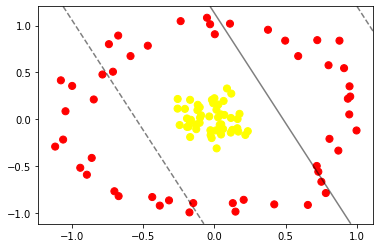

In [16]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X, Y), plot_support=False)

In [17]:
r = np.exp(-(X**2).sum(1))

In [18]:
r

array([0.43032658, 0.98391437, 0.97667455, 0.35701659, 0.98966938,
       0.93811158, 0.32684089, 0.43850891, 0.35893168, 0.93036229,
       0.2859145 , 0.99492529, 0.96413058, 0.95565444, 0.44324801,
       0.3644286 , 0.36316244, 0.37685876, 0.96260926, 0.95732664,
       0.99514562, 0.98607308, 0.97184601, 0.98078042, 0.96565277,
       0.46840306, 0.98932198, 0.95786174, 0.33455985, 0.37210936,
       0.46655483, 0.97369948, 0.98603501, 0.29268176, 0.88995217,
       0.43009083, 0.9276681 , 0.45948717, 0.30455167, 0.97449858,
       0.49856955, 0.22864872, 0.41972514, 0.34086687, 0.44921767,
       0.97071356, 0.3108437 , 0.97218512, 0.29053284, 0.34876698,
       0.97183406, 0.99479851, 0.429237  , 0.40406968, 0.31825856,
       0.94674437, 0.26458991, 0.36872623, 0.31724441, 0.44159762,
       0.37952803, 0.93950764, 0.96548196, 0.973616  , 0.91392889,
       0.31564385, 0.26513378, 0.98582018, 0.98626181, 0.43423894,
       0.97324159, 0.39589278, 0.34815465, 0.96328888, 0.98984

In [19]:
from mpl_toolkits import mplot3d 

In [20]:
def plot_3D(elev = 30, azim = 30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:,0], X[:,1], r, c= Y, cmap ="autumn")
    ax.view_init(elev = elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")


In [21]:
from ipywidgets import interact, fixed

In [23]:
interact(plot_3D, elev = [-90, -60, 30, 0, 30, 60, 90], azim = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], X =fixed(X), Y =fixed(Y),r =fixed(r) )

interactive(children=(Dropdown(description='elev', index=2, options=(-90, -60, 30, 0, 30, 60, 90), value=30), …

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.78368541,  0.47858965],
       [ 0.03382167, -0.12277012],
       [-0.11770531,  0.09872816],
       [-0.02889361,  1.01446449],
       [-0.09206477,  0.0436856 ],
       [-0.16888341, -0.18805523],
       [-0.6702961 , -0.817915  ],
       [ 0.00418675,  0.90794142],
       [ 0.94878775,  0.35273933],
       [-0.1692546 ,  0.20864824],
       [-0.673256  ,  0.89374987],
       [ 0.04736628,  0.05332975],
       [-0.19086498,  0.00995462],
       [ 0.16874921, -0.12993305],
       [ 0.13023207, -0.89256116],
       [ 0.99774786, -0.11799928],
       [-0.17365906, -0.99133625],
       [ 0.801493  ,  0.5774892 ],
       [-0.17922129, -0.0773785 ],
       [-0.01616265,  0.20820517],
       [ 0.03847556, -0.05818793],
       [ 0.11744001,  0.0152531 ],
       [-0.02541521, -0.16706878],
       [-0.12838909, -0.05406404],
       [ 0.1772908 ,  0.05932059],
       [-0.84455309,  0.21249984],
       [ 0.01555562,  0.10243759],
       [

In [32]:
rbf = SVC(kernel="rbf", C=1E6, gamma='auto')
rbf.fit(X, Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

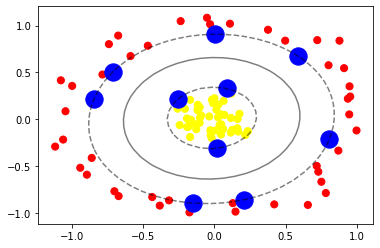

In [35]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)

## Ajustar los parámetros de SVM

In [51]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

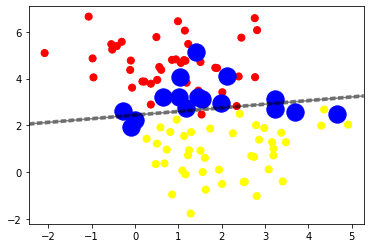

In [52]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10E6)
model.fit(X, Y)
plt_svc(model)

In [39]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

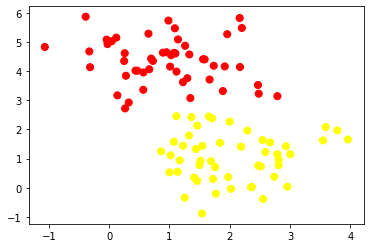

In [40]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

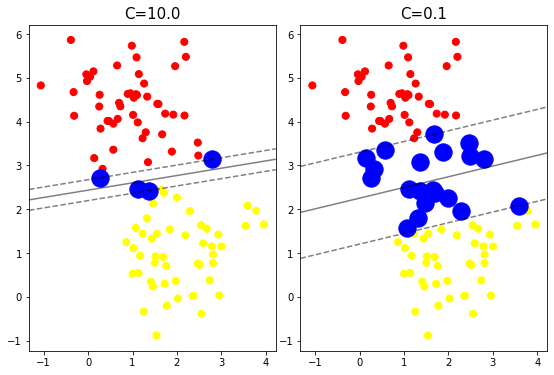

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left = 0.5, right = 0.95, wspace= 0.1)


for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X, Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C={0:.1f}".format(C), size=15)